In [56]:
import pandas as pd

conspiracy_belief = pd.read_csv("data/conspiracy_belief_score.csv")

conspiracy_belief.shape

(2301, 8)

In [57]:
conspiracy_belief.head()

,conspiracy_belief_score,education,childhood,gender,hand,family_size,age,test_time
0,4.333333,Less than high school,Suburban,Female,Right,1,14,125
1,2.466667,Graduate degree,Suburban,Female,Right,2,26,141
2,3.666667,University degree,Rural (country side),Male,Right,3,25,58
3,3.933333,High school,Suburban,Male,Right,2,37,105
4,1.000000,University degree,Rural (country side),Male,Right,2,34,87


In [58]:
import pandas_profiling

pandas_profiling.ProfileReport(conspiracy_belief)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
conspiracy_belief = pd.get_dummies(conspiracy_belief, drop_first=True)

In [60]:
conspiracy_belief

,conspiracy_belief_score,family_size,age,test_time,education_High school,education_Less than high school,education_University degree,childhood_Suburban,"childhood_Urban (town, city)",gender_Male,gender_Other,hand_Right
0,4.333333,1,14,125,0,1,0,1,0,0,0,1
1,2.466667,2,26,141,0,0,0,1,0,0,0,1
2,3.666667,3,25,58,0,0,1,0,0,1,0,1
3,3.933333,2,37,105,1,0,0,1,0,1,0,1
4,1.000000,2,34,87,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2296,3.066667,3,32,116,0,0,1,0,1,1,0,1
2297,1.333333,2,25,68,0,0,0,1,0,0,0,0
2298,3.800000,2,34,100,1,0,0,0,1,0,0,1
2299,1.666667,2,19,139,1,0,0,1,0,1,0,1


# Model building with Scikit-learn

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
# set our response array 
response_var = conspiracy_belief["conspiracy_belief_score"]

# put our predictors in a data frame
predictor_vars = conspiracy_belief.drop(columns = "conspiracy_belief_score")

In [63]:
response_var
type(response_var)

pandas.core.series.Series

In [64]:
predictor_vars
type(predictor_vars)

pandas.core.frame.DataFrame

### Fit linear model

In [65]:
model = LinearRegression()

model.fit(predictor_vars, response_var)

LinearRegression()

Unlike R, we don't have a handy summary of the model. But we can pull out the R-squared value by using the `score` method.

In [66]:
model.score(predictor_vars, response_var)

0.040043284303887816

04% accuracy is not good

To get the coefficients, we need to do it in two parts. We get the coefficient for the `intercept` by looking at the intercept_ attribute.

In [67]:
model.intercept_

2.3970967575928044

And we get the rest of the coefficients using the `coef_` attribute. These coefficients are returned in the same order as the variables appear in the data.

In [68]:
model.coef_

array([ 3.87812859e-02,  7.39820803e-03,  1.05323590e-04,  4.34347163e-01,
        3.32422446e-01,  1.45233709e-01, -5.03516396e-02,  1.10445101e-01,
       -2.09621506e-01,  5.34224823e-03, -2.52485900e-02])

**Task - 5 minutes**  
Interpret the R-squared value
Interpret some of the coefficients. (Hint - think about how you could combine this array output with the column names to easily see which value corresponds to what variable in the data).

In [69]:
predictor_vars.columns

Index(['family_size', 'age', 'test_time', 'education_High school',
       'education_Less than high school', 'education_University degree',
       'childhood_Suburban', 'childhood_Urban (town, city)', 'gender_Male',
       'gender_Other', 'hand_Right'],
      dtype='object')

In [70]:
pd.DataFrame(model.coef_, index=predictor_vars.columns)

,0
family_size,0.038781
age,0.007398
test_time,0.000105
education_High school,0.434347
education_Less than high school,0.332422
education_University degree,0.145234
childhood_Suburban,-0.050352
"childhood_Urban (town, city)",0.110445
gender_Male,-0.209622
gender_Other,0.005342


In [71]:
import statsmodels.api as sm

In [72]:
predictor_vars = sm.add_constant(predictor_vars)
predictor_vars


,const,family_size,age,test_time,education_High school,education_Less than high school,education_University degree,childhood_Suburban,"childhood_Urban (town, city)",gender_Male,gender_Other,hand_Right
0,1.0,1,14,125,0,1,0,1,0,0,0,1
1,1.0,2,26,141,0,0,0,1,0,0,0,1
2,1.0,3,25,58,0,0,1,0,0,1,0,1
3,1.0,2,37,105,1,0,0,1,0,1,0,1
4,1.0,2,34,87,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2296,1.0,3,32,116,0,0,1,0,1,1,0,1
2297,1.0,2,25,68,0,0,0,1,0,0,0,0
2298,1.0,2,34,100,1,0,0,0,1,0,0,1
2299,1.0,2,19,139,1,0,0,1,0,1,0,1


In [73]:
sm_model = sm.OLS(response_var, predictor_vars).fit()
print(sm_model.summary())

                               OLS Regression Results                              
Dep. Variable:     conspiracy_belief_score   R-squared:                       0.040
Model:                                 OLS   Adj. R-squared:                  0.035
Method:                      Least Squares   F-statistic:                     8.680
Date:                     Thu, 03 Feb 2022   Prob (F-statistic):           3.09e-15
Time:                             13:30:18   Log-Likelihood:                -3293.1
No. Observations:                     2301   AIC:                             6610.
Df Residuals:                         2289   BIC:                             6679.
Df Model:                               11                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

## Diagnostic Plot

In [74]:
#first calculate the residuals
residuals = sm_model.fittedvalues - response_var

Text(0, 0.5, 'Residual')

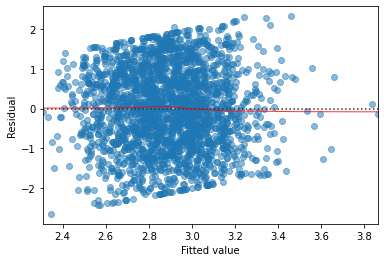

In [75]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.residplot(
    x = sm_model.fittedvalues,
    y = residuals,
    lowess = True,
    scatter_kws = {'alpha': 0.5},
    line_kws = {
        'color':'red',
        'lw':1,
        'alpha':0.8
    }
)
plt.xlabel('Fitted value')
plt.ylabel('Residual')

good, error stays constant


### Normal-QQ plot

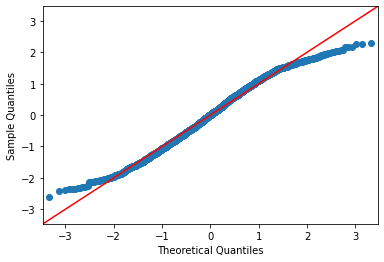

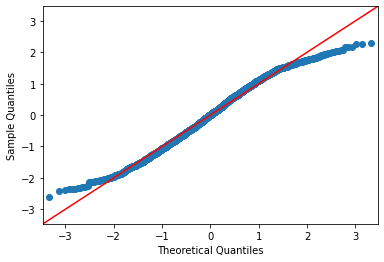

In [76]:
import scipy.stats as stats

sm.qqplot(
    residuals, 
    dist=stats.t, 
    fit=True, 
    line='45'
)

help(sm.qqplot(  
    residuals,   
    dist=stats.t,   
    fit=True,   
    line='45'  
))

 or

`shift` + `tab` in the `()` ie `sm.qqplot(^)`

### Logistic Regression

In [77]:
loans = pd.read_csv("data/loans.csv")

In [78]:
loans

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,purpose,loan_status
0,5000.0,36 months,10.65,B,RENT,24000.0,credit_card,Fully Paid
1,2500.0,60 months,15.27,C,RENT,30000.0,car,Charged Off
2,2400.0,36 months,15.96,C,RENT,12252.0,small_business,Fully Paid
3,10000.0,36 months,13.49,C,RENT,49200.0,other,Fully Paid
4,3000.0,60 months,12.69,B,RENT,80000.0,other,Current
...,...,...,...,...,...,...,...,...
42535,6500.0,36 months,8.38,A,NONE,NaN,other,Does not meet the credit policy. Status:Fully ...
42536,5000.0,36 months,7.75,A,MORTGAGE,70000.0,other,Does not meet the credit policy. Status:Fully ...
42537,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
42538,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN


In [79]:
pandas_profiling.ProfileReport(loans)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* Get current loans
* Clean na's
* Create dummy cols

In [80]:
loans_clean = (
    loans
    .loc[~(loans.loan_status == 'Current')]
    .copy()
)

# or

#loans_clean = (
#    loans
#    .loc[loans.loan_status != 'Current']
#    .copy()
#)

In [81]:
loans_clean.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,purpose,loan_status
0,5000.0,36 months,10.65,B,RENT,24000.0,credit_card,Fully Paid
1,2500.0,60 months,15.27,C,RENT,30000.0,car,Charged Off
2,2400.0,36 months,15.96,C,RENT,12252.0,small_business,Fully Paid
3,10000.0,36 months,13.49,C,RENT,49200.0,other,Fully Paid
5,5000.0,36 months,7.90,A,RENT,36000.0,wedding,Fully Paid


In [82]:
loans_clean.isna().sum()

loan_amnt         5
term              5
int_rate          5
grade             0
home_ownership    5
annual_inc        9
purpose           5
loan_status       5
dtype: int64

In [83]:
len(loans_clean)

41713

In [84]:
# max na's being 9, so just removed them all
loans_clean.dropna(inplace=True)

In [85]:
len(loans_clean)

41704

In [86]:
loans_clean.isna().sum()

loan_amnt         0
term              0
int_rate          0
grade             0
home_ownership    0
annual_inc        0
purpose           0
loan_status       0
dtype: int64

In [87]:
import numpy as np

In [88]:
# Create dummy col for loan_status
loans_clean['paid'] = (
    np.where(loans_clean["loan_status"] == "Fully Paid", 1, 0)
)

loans_clean.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,purpose,loan_status,paid
0,5000.0,36 months,10.65,B,RENT,24000.0,credit_card,Fully Paid,1
1,2500.0,60 months,15.27,C,RENT,30000.0,car,Charged Off,0
2,2400.0,36 months,15.96,C,RENT,12252.0,small_business,Fully Paid,1
3,10000.0,36 months,13.49,C,RENT,49200.0,other,Fully Paid,1
5,5000.0,36 months,7.90,A,RENT,36000.0,wedding,Fully Paid,1


In [89]:
loans_clean

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,purpose,loan_status,paid
0,5000.0,36 months,10.65,B,RENT,24000.0,credit_card,Fully Paid,1
1,2500.0,60 months,15.27,C,RENT,30000.0,car,Charged Off,0
2,2400.0,36 months,15.96,C,RENT,12252.0,small_business,Fully Paid,1
3,10000.0,36 months,13.49,C,RENT,49200.0,other,Fully Paid,1
5,5000.0,36 months,7.90,A,RENT,36000.0,wedding,Fully Paid,1
...,...,...,...,...,...,...,...,...,...
42531,6500.0,36 months,9.64,B,RENT,20000.0,other,Does not meet the credit policy. Status:Charge...,0
42532,3500.0,36 months,10.28,C,RENT,180000.0,other,Does not meet the credit policy. Status:Fully ...,0
42533,1000.0,36 months,9.64,B,RENT,12000.0,other,Does not meet the credit policy. Status:Fully ...,0
42534,2525.0,36 months,9.33,B,RENT,110000.0,other,Does not meet the credit policy. Status:Fully ...,0


We want to predict if a loan has been paid off, but we have several values for `loan_status`. We need to make a new column that just checks if loan status is equal to "Fully Paid", and return a value of `1` if it is, and 0 if it isn't. This is because `scikit-learn` always needs numeric data. We can use the function `where` from `numpy` that we saw yesterday to do this.

In [90]:
loans_clean.drop(columns = "loan_status", inplace = True)

loans_clean.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,purpose,paid
0,5000.0,36 months,10.65,B,RENT,24000.0,credit_card,1
1,2500.0,60 months,15.27,C,RENT,30000.0,car,0
2,2400.0,36 months,15.96,C,RENT,12252.0,small_business,1
3,10000.0,36 months,13.49,C,RENT,49200.0,other,1
5,5000.0,36 months,7.90,A,RENT,36000.0,wedding,1


In [91]:
loans_clean = pd.get_dummies(loans_clean, drop_first=True)
loans_clean.head()

,loan_amnt,int_rate,annual_inc,paid,term_60 months,grade_B,grade_C,grade_D,grade_E,grade_F,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,10.65,24000.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,15.27,30000.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,15.96,12252.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,13.49,49200.0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,5000.0,7.90,36000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [92]:
loans_predictors = loans_clean.drop(columns = "paid")
loans_response = loans_clean["paid"]

,loan_amnt,int_rate,annual_inc,paid,term_60 months,grade_B,grade_C,grade_D,grade_E,grade_F,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,10.65,24000.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,15.27,30000.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,15.96,12252.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,13.49,49200.0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,5000.0,7.90,36000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Train test split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
#loans_pred_train, loans_pred_test, loans_resp_train, loans_resp_test = \
#train_test_split(loans_predictors, loans_response, test_size = 0.1, random_state = 7)

In [93]:
# all four var made in the smae code

loans_pred_train, loans_pred_test, loans_resp_train, loans_resp_test = (
    train_test_split(
        loans_predictors, 
        loans_response, 
        test_size = 0.1, 
        random_state = 7
    )
)

In [94]:
loans_pred_train

,loan_amnt,int_rate,annual_inc,term_60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
31748,4750.0,10.99,123000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25524,5300.0,11.12,92304.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8744,2500.0,10.99,64000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2724,19425.0,20.89,46500.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
40953,11000.0,19.47,50004.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34967,2800.0,13.57,66120.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14754,12375.0,18.79,36000.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
983,18000.0,16.29,66000.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39294,6000.0,8.00,60000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
loans_pred_test

,loan_amnt,int_rate,annual_inc,term_60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
18742,6400.0,7.29,100000.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12515,9425.0,11.49,72800.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38079,20000.0,16.95,150000.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9628,20000.0,16.49,60000.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9338,12000.0,13.49,60000.0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36808,3000.0,9.63,52000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
20594,10000.0,10.37,85000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22131,2250.0,10.36,70000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13232,11500.0,6.99,56000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# from notes
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(loans_pred_train, loans_resp_train)

LogisticRegression()

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
model.fit(loans_pred_train, loans_resp_train)
scores = cross_val_score(
    model, loans_pred_train, loans_resp_train, scoring='accuracy', cv=10
)

In [99]:
# training scores
print(model.score(loans_pred_train, loans_resp_train))
print(np.mean(scores))

0.7977246689579837
0.7977246758799673


In [100]:
# test scores
model.score(loans_pred_test, loans_resp_test)

0.7995684488132342

In [101]:
pred_test = model.predict_proba(loans_pred_test)
pd.DataFrame(pred_test)

,0,1
0,0.175368,0.824632
1,0.223048,0.776952
2,0.070035,0.929965
3,0.207650,0.792350
4,0.243051,0.756949
...,...,...
4166,0.310741,0.689259
4167,0.192845,0.807155
4168,0.263663,0.736337
4169,0.255802,0.744198


In [103]:
pred_test = pred_test[:,1]
pred_test

array([0.82463229, 0.77695187, 0.92996457, ..., 0.73633681, 0.74419821,
       0.78736641])

In [105]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true=loans_resp_test, y_score=pred_test)

0.5266430779825398

**Task - 2 minutes**  

Take a look at google. What does this AUC score tell you? How should we interpret this?

not good and about 50%

<br>


#### Randomforest

In [107]:
from sklearn.ensemble import RandomForestClassifier

# run th emodel with 10 trees
model = RandomForestClassifier(n_estimators = 100)

# train the model on the training data
model.fit(loans_pred_train, loans_resp_train)

RandomForestClassifier()

**Task - 5 minutes**

Find the mean accuracy on the test data and compare it to our two other models.

In [108]:
model.score(loans_pred_test, loans_resp_test)

0.7904579237592904

In [114]:
scores = cross_val_score(
    model, loans_pred_train, loans_resp_train, scoring = 'accuracy', cv =5)

In [115]:
scores.mean()

0.7918365525154585